# DIOMIRA OUTPUT IN ADC

Since the purpose of DIOMIRA is to convert MC-simulated data to real-world data, its output must be the same. Therefore, in addition to the simulation of the sensors' response, the produced waveforms must be converted to adc.

This conversion is done by the funcion to_adc in [wfmFunctions.py](../../../Core/wfmFunctions.dat):

In [ ]:
def to_adc( wfs, sensdf ):
    '''
        Scale waveform in pes to adc.
    '''
    return wfs / sensdf['adc_to_pes'].reshape(wfs.shape[0],1)

This simple function is applied directly to the output of the simulate_pmt_response and simulate_sipm_response functions in [DIOMIRA.py](../../../Cities/DIOMIRA.py):

```
dataPMT = ***wfm.to_adc***(simulate_pmt_response(i,pmtrd_),pmtdf)
dataPMT.astype(int)
pmtrwf.append(dataPMT.reshape(1, NPMT, PMTWL_FEE))

dataSiPM = ***wfm.to_adc***(simulate_sipm_response(i,sipmrd_,sipms_noise_sampler_),sipmdf)
dataSiPM.astype(int)
sipmrwf.append( dataSiPM.reshape(1,NSIPM,SIPMWL) )
```


The .astype(int) instruction forces the array to contain integers getting rid of the mantissa. This truncation is negligible in comparison with the number of adc counts.

The noise is still simulated in pes, as it is simpler and more efficient to do so and scale the waveform afterwards.

# Running DIOMIRA

In [1]:
%cd ../../../Cities/

/Users/Gonzalo/github/IC/Cities


#%load ../Config/DIOMIRA_default.csv
#Configuration file for DIOMIRA
PATH_IN,PATH_OUT,FILE_IN,FILE_OUT,PATH_DB,NOISE_CUT_FRACTION,FIRST_EVT,LAST_EVT,RUN_ALL,END,CLIB,CLEVEL
/Users/Gonzalo/github/IC/data/,/Users/Gonzalo/github/IC/data/,in0.h5,out0.h5,/Users/Gonzalo/github/IC/Database/,0.999,0,10,0,1,zlib,1


In [2]:
run DIOMIRA.py -c ../Config/DIOMIRA_default.csv

/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Debug level = INFO
input path =/Users/Gonzalo/github/IC/data/; output path = /Users/Gonzalo/github/IC/data/; file_in =in0.h5 file_out =out0.h5
path to database = /Users/Gonzalo/github/IC/Database/
first event = 0 last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1789 nof events in input DST = 100 
lof SiPM WF = 800000 lof PMT WF (MC) = 800 lof PMT WF (FEE) = 32000
Initializing NoiseSampler... 1789
OK
-->event number =0


/Applications/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:3073: FutureWarning:  Note: Decimate's zero_phase keyword argument will default to True in a future release. Until then, decimate defaults to one-way filtering for backwards compatibility. Ideally, always set this argument explicitly.
  "explicitly.", FutureWarning)


-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
DIOMIRA has run over 9 events in 21.0546858311 seconds
Leaving Diomira. Safe travels!


# Data check

In [11]:
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
#%load_ext line_profiler
#%load_ext memory_profiler
print(time.strftime("%d/%m/%Y"))
print(time.strftime("%H:%M:%S"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
15/10/2016
02:23:13


In [12]:
#### move to where data is stored
#%cd ../data/
%cd ../../../data

[Errno 2] No such file or directory: '../../../data'
/Users/Gonzalo/github/IC/data


In [13]:
%ls .

in0.h5   out0.h5


In [14]:
# open file and check its contents
h5f = tb.open_file('out0.h5')
print(h5f)

out0.h5 (File) ''
Last modif.: 'Sat Oct 15 02:20:46 2016'
Object Tree: 
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtrwf (EArray(10, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(10, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(141,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(1007,), shuffle, zlib(1)) 'Store for SiPMs TWF'



In [24]:
pmttwfs  = h5f.root.TWF.PMT
sipmtwfs = h5f.root.TWF.SiPM
pmtrwfs  = h5f.root.RD.pmtrwf
sipmrwfs = h5f.root.RD.sipmrwf
pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

In [25]:
### Bigger picturesº
plt.rcParams['figure.figsize'] = (12, 8)

In [26]:
#sipmdf['adc_to_pes']

SiPM with greatest peak is at index 331 with ID 6011.0


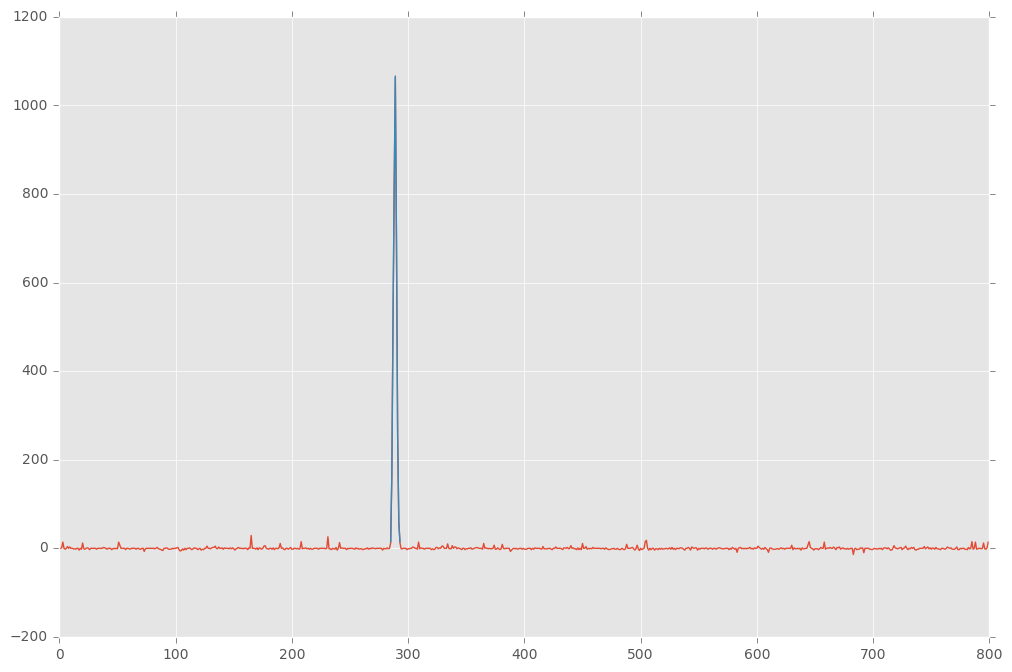

In [30]:
mpl.plot_best(sipmrwfs,sipmtwfs, sipmdf, evt = 0)

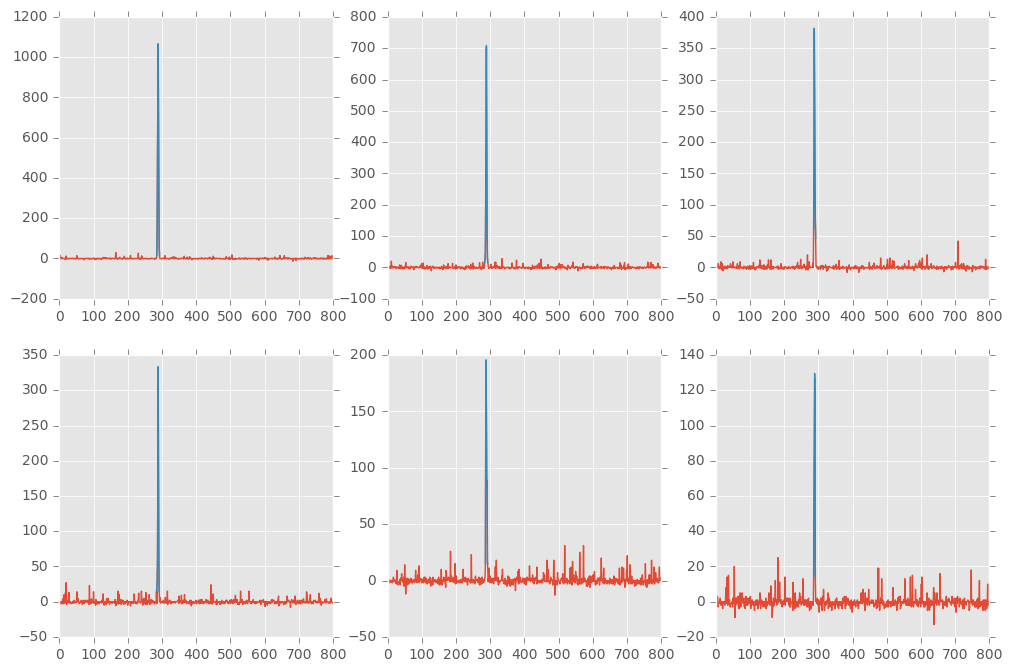

In [35]:
mpl.plot_best_group(sipmrwfs,sipmtwfs, sipmdf, evt = 0, nsipms = 6, ncols = 3)

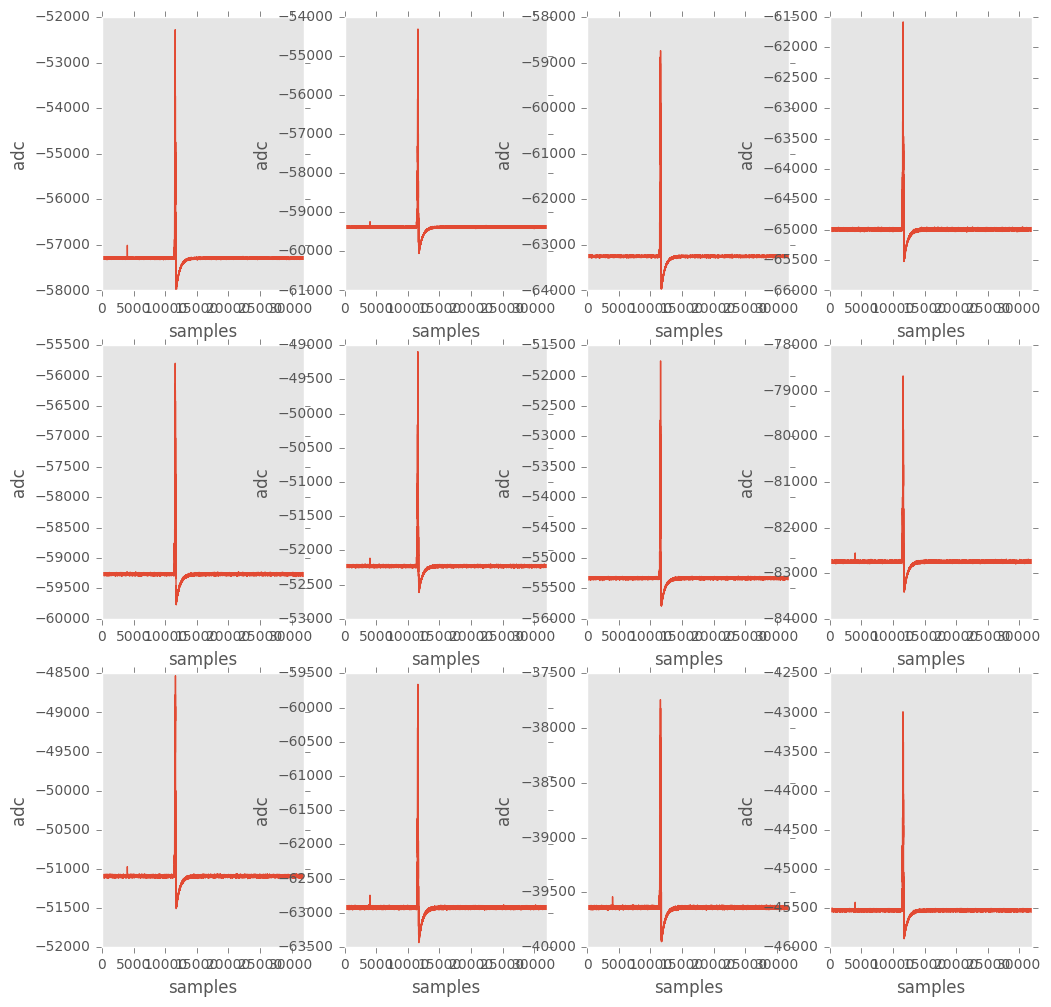

Press a key...


In [ ]:
mpl.scan_waveforms(pmtrwfs, range(10))